In [1]:
%matplotlib inline

In [2]:
%run notebook_setup

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


theano version: 1.0.4


pymc3 version: 3.6


exoplanet version: 0.1.7.dev0


In [3]:
ndim = 15

In [4]:
import time

import emcee
import numpy as np

import pymc3 as pm
from pymc3.step_methods.hmc import quadpotential as quad

In [5]:
np.random.seed(41)

with pm.Model() as model:
    pm.Normal("x", shape=ndim)
    
    potential = quad.QuadPotentialDiag(np.ones(ndim))
    
    step_kwargs = dict()
    step_kwargs["model"] = model
    step_kwargs["step_scale"] = 1.0 * model.ndim ** 0.25
    step_kwargs["adapt_step_size"] = False
    step = pm.NUTS(potential=potential, **step_kwargs)

    start = time.time()
    trace = pm.sample(tune=0, draws=10000, step=step, cores=1)
    time_pymc3 = time.time() - start

Sequential sampling (2 chains in 1 job)


NUTS: [x]


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:00<1:05:18,  2.55it/s]

  1%|▏         | 148/10000 [00:00<45:04,  3.64it/s]

  3%|▎         | 303/10000 [00:00<31:05,  5.20it/s]

  5%|▍         | 465/10000 [00:00<21:25,  7.42it/s]

  6%|▋         | 626/10000 [00:00<14:46, 10.57it/s]

  8%|▊         | 784/10000 [00:00<10:11, 15.06it/s]

  9%|▉         | 939/10000 [00:00<07:02, 21.43it/s]

 11%|█         | 1101/10000 [00:01<04:52, 30.44it/s]

 13%|█▎        | 1251/10000 [00:01<03:22, 43.10it/s]

 14%|█▍        | 1410/10000 [00:01<02:21, 60.87it/s]

 16%|█▌        | 1566/10000 [00:01<01:38, 85.52it/s]

 17%|█▋        | 1720/10000 [00:01<01:09, 119.32it/s]

 19%|█▉        | 1881/10000 [00:01<00:49, 165.19it/s]

 20%|██        | 2036/10000 [00:01<00:35, 225.16it/s]

 22%|██▏       | 2191/10000 [00:01<00:25, 302.70it/s]

 24%|██▎       | 2350/10000 [00:01<00:19, 399.69it/s]

 25%|██▌       | 2505/10000 [00:02<00:14, 503.00it/s]

 27%|██▋       | 2655/10000 [00:02<00:11, 627.97it/s]

 28%|██▊       | 2808/10000 [00:02<00:09, 762.75it/s]

 30%|██▉       | 2967/10000 [00:02<00:07, 903.51it/s]

 31%|███▏      | 3125/10000 [00:02<00:06, 1035.69it/s]

 33%|███▎      | 3279/10000 [00:02<00:05, 1146.34it/s]

 34%|███▍      | 3433/10000 [00:02<00:05, 1234.20it/s]

 36%|███▌      | 3589/10000 [00:02<00:04, 1315.35it/s]

 37%|███▋      | 3743/10000 [00:02<00:04, 1360.93it/s]

 39%|███▉      | 3896/10000 [00:02<00:04, 1403.77it/s]

 41%|████      | 4053/10000 [00:03<00:04, 1449.24it/s]

 42%|████▏     | 4213/10000 [00:03<00:03, 1490.88it/s]

 44%|████▎     | 4369/10000 [00:03<00:03, 1489.02it/s]

 45%|████▌     | 4531/10000 [00:03<00:03, 1524.42it/s]

 47%|████▋     | 4687/10000 [00:03<00:03, 1526.85it/s]

 48%|████▊     | 4842/10000 [00:03<00:03, 1529.94it/s]

 50%|████▉     | 4997/10000 [00:03<00:03, 1451.68it/s]

 52%|█████▏    | 5150/10000 [00:03<00:03, 1473.05it/s]

 53%|█████▎    | 5301/10000 [00:03<00:03, 1481.60it/s]

 55%|█████▍    | 5459/10000 [00:03<00:03, 1506.30it/s]

 56%|█████▌    | 5616/10000 [00:04<00:02, 1523.32it/s]

 58%|█████▊    | 5770/10000 [00:04<00:02, 1526.60it/s]

 59%|█████▉    | 5924/10000 [00:04<00:02, 1528.53it/s]

 61%|██████    | 6079/10000 [00:04<00:02, 1531.39it/s]

 62%|██████▏   | 6233/10000 [00:04<00:02, 1507.12it/s]

 64%|██████▍   | 6394/10000 [00:04<00:02, 1535.06it/s]

 65%|██████▌   | 6548/10000 [00:04<00:02, 1521.25it/s]

 67%|██████▋   | 6701/10000 [00:04<00:02, 1518.73it/s]

 69%|██████▊   | 6858/10000 [00:04<00:02, 1532.06it/s]

 70%|███████   | 7014/10000 [00:04<00:01, 1538.45it/s]

 72%|███████▏  | 7168/10000 [00:05<00:01, 1533.03it/s]

 73%|███████▎  | 7322/10000 [00:05<00:01, 1504.58it/s]

 75%|███████▍  | 7473/10000 [00:05<00:01, 1469.47it/s]

 76%|███████▋  | 7626/10000 [00:05<00:01, 1485.96it/s]

 78%|███████▊  | 7775/10000 [00:05<00:01, 1479.22it/s]

 79%|███████▉  | 7930/10000 [00:05<00:01, 1499.14it/s]

 81%|████████  | 8081/10000 [00:05<00:01, 1475.39it/s]

 82%|████████▏ | 8229/10000 [00:05<00:01, 1459.38it/s]

 84%|████████▍ | 8376/10000 [00:05<00:01, 1461.84it/s]

 85%|████████▌ | 8523/10000 [00:06<00:01, 1459.07it/s]

 87%|████████▋ | 8676/10000 [00:06<00:00, 1477.80it/s]

 88%|████████▊ | 8838/10000 [00:06<00:00, 1514.13it/s]

 90%|████████▉ | 8993/10000 [00:06<00:00, 1522.30it/s]

 91%|█████████▏| 9146/10000 [00:06<00:00, 1524.57it/s]

 93%|█████████▎| 9299/10000 [00:06<00:00, 1497.26it/s]

 94%|█████████▍| 9449/10000 [00:06<00:00, 1494.25it/s]

 96%|█████████▌| 9601/10000 [00:06<00:00, 1499.20it/s]

 98%|█████████▊| 9752/10000 [00:06<00:00, 1454.32it/s]

 99%|█████████▉| 9903/10000 [00:06<00:00, 1467.87it/s]

100%|██████████| 10000/10000 [00:06<00:00, 1428.98it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]

  1%|▏         | 144/10000 [00:00<00:06, 1431.85it/s]

  3%|▎         | 299/10000 [00:00<00:06, 1464.35it/s]

  5%|▍         | 453/10000 [00:00<00:06, 1484.50it/s]

  6%|▌         | 612/10000 [00:00<00:06, 1514.40it/s]

  8%|▊         | 767/10000 [00:00<00:06, 1523.99it/s]

  9%|▉         | 927/10000 [00:00<00:05, 1543.98it/s]

 11%|█         | 1074/10000 [00:00<00:05, 1519.23it/s]

 12%|█▏        | 1230/10000 [00:00<00:05, 1529.80it/s]

 14%|█▍        | 1383/10000 [00:00<00:05, 1528.19it/s]

 15%|█▌        | 1540/10000 [00:01<00:05, 1540.18it/s]

 17%|█▋        | 1697/10000 [00:01<00:05, 1548.19it/s]

 19%|█▊        | 1855/10000 [00:01<00:05, 1555.98it/s]

 20%|██        | 2013/10000 [00:01<00:05, 1560.20it/s]

 22%|██▏       | 2168/10000 [00:01<00:05, 1511.92it/s]

 23%|██▎       | 2319/10000 [00:01<00:05, 1484.71it/s]

 25%|██▍       | 2479/10000 [00:01<00:04, 1515.89it/s]

 26%|██▋       | 2639/10000 [00:01<00:04, 1539.03it/s]

 28%|██▊       | 2798/10000 [00:01<00:04, 1551.55it/s]

 30%|██▉       | 2954/10000 [00:01<00:04, 1545.35it/s]

 31%|███       | 3109/10000 [00:02<00:04, 1532.49it/s]

 33%|███▎      | 3263/10000 [00:02<00:04, 1506.99it/s]

 34%|███▍      | 3424/10000 [00:02<00:04, 1534.69it/s]

 36%|███▌      | 3578/10000 [00:02<00:04, 1520.75it/s]

 37%|███▋      | 3734/10000 [00:02<00:04, 1531.00it/s]

 39%|███▉      | 3890/10000 [00:02<00:03, 1539.55it/s]

 40%|████      | 4045/10000 [00:02<00:03, 1526.31it/s]

 42%|████▏     | 4202/10000 [00:02<00:03, 1532.71it/s]

 44%|████▎     | 4356/10000 [00:02<00:03, 1519.86it/s]

 45%|████▌     | 4509/10000 [00:02<00:03, 1499.90it/s]

 47%|████▋     | 4660/10000 [00:03<00:03, 1502.37it/s]

 48%|████▊     | 4812/10000 [00:03<00:03, 1505.75it/s]

 50%|████▉     | 4973/10000 [00:03<00:03, 1533.21it/s]

 51%|█████▏    | 5127/10000 [00:03<00:03, 1534.29it/s]

 53%|█████▎    | 5281/10000 [00:03<00:03, 1523.41it/s]

 54%|█████▍    | 5436/10000 [00:03<00:02, 1529.28it/s]

 56%|█████▌    | 5590/10000 [00:03<00:02, 1531.71it/s]

 57%|█████▋    | 5744/10000 [00:03<00:02, 1465.82it/s]

 59%|█████▉    | 5894/10000 [00:03<00:02, 1474.16it/s]

 60%|██████    | 6042/10000 [00:03<00:02, 1464.35it/s]

 62%|██████▏   | 6191/10000 [00:04<00:02, 1469.82it/s]

 63%|██████▎   | 6339/10000 [00:04<00:02, 1457.06it/s]

 65%|██████▍   | 6494/10000 [00:04<00:02, 1482.15it/s]

 66%|██████▋   | 6643/10000 [00:04<00:02, 1480.15it/s]

 68%|██████▊   | 6801/10000 [00:04<00:02, 1506.21it/s]

 70%|██████▉   | 6954/10000 [00:04<00:02, 1511.96it/s]

 71%|███████   | 7106/10000 [00:04<00:01, 1512.10it/s]

 73%|███████▎  | 7259/10000 [00:04<00:01, 1515.76it/s]

 74%|███████▍  | 7417/10000 [00:04<00:01, 1532.01it/s]

 76%|███████▌  | 7571/10000 [00:04<00:01, 1532.38it/s]

 77%|███████▋  | 7725/10000 [00:05<00:01, 1520.86it/s]

 79%|███████▉  | 7878/10000 [00:05<00:01, 1492.77it/s]

 80%|████████  | 8028/10000 [00:05<00:01, 1484.39it/s]

 82%|████████▏ | 8180/10000 [00:05<00:01, 1491.38it/s]

 83%|████████▎ | 8330/10000 [00:05<00:01, 1486.47it/s]

 85%|████████▍ | 8488/10000 [00:05<00:01, 1510.02it/s]

 86%|████████▋ | 8640/10000 [00:05<00:00, 1503.22it/s]

 88%|████████▊ | 8792/10000 [00:05<00:00, 1506.19it/s]

 89%|████████▉ | 8949/10000 [00:05<00:00, 1521.83it/s]

 91%|█████████ | 9105/10000 [00:06<00:00, 1532.42it/s]

 93%|█████████▎| 9264/10000 [00:06<00:00, 1547.45it/s]

 94%|█████████▍| 9422/10000 [00:06<00:00, 1556.33it/s]

 96%|█████████▌| 9578/10000 [00:06<00:00, 1525.10it/s]

 97%|█████████▋| 9731/10000 [00:06<00:00, 1510.19it/s]

 99%|█████████▉| 9883/10000 [00:06<00:00, 1494.09it/s]

100%|██████████| 10000/10000 [00:06<00:00, 1516.37it/s]

The acceptance probability does not match the target. It is 0.7000475965558693, but should be close to 0.8. Try to increase the number of tuning steps.


The acceptance probability does not match the target. It is 0.6982303140324398, but should be close to 0.8. Try to increase the number of tuning steps.


In [6]:
samples_pymc3 = np.array(trace.get_values("x", combine=False))
samples_pymc3 = np.moveaxis(samples_pymc3, 0, 1)
tau_pymc3 = emcee.autocorr.integrated_time(samples_pymc3)
neff_pymc3 = np.prod(samples_pymc3.shape[:2]) / tau_pymc3
teff_pymc3 = time_pymc3 / neff_pymc3
teff_pymc3

array([0.00043191, 0.00041628, 0.00044539, 0.00045601, 0.00044553,
       0.00042962, 0.00045535, 0.00044874, 0.00043603, 0.00041373,
       0.00044427, 0.00046386, 0.00041018, 0.00040899, 0.00042817])

In [7]:
np.random.seed(1234)

import exoplanet as xo

with model:
    func = xo.get_theano_function_for_var(model.logpt)
    
    def logprob(theta):
        point = model.bijection.rmap(theta)
        args = xo.get_args_for_theano_function(point)
        return func(*args)
    
    x0 = np.random.randn(ndim)
    nwalkers = 36
    x0 = np.random.randn(nwalkers, ndim)
    
    emcee_sampler = emcee.EnsembleSampler(nwalkers, ndim, logprob)
    state = emcee_sampler.run_mcmc(x0, 2000, progress=True)
    emcee_sampler.reset()
    strt = time.time()
    emcee_sampler.run_mcmc(state, 20000, progress=True)
    time_emcee = time.time() - strt

  0%|          | 0/2000 [00:00<?, ?it/s]

  2%|▏         | 46/2000 [00:00<00:04, 455.42it/s]

  4%|▍         | 90/2000 [00:00<00:04, 449.73it/s]

  7%|▋         | 133/2000 [00:00<00:04, 441.73it/s]

  9%|▉         | 178/2000 [00:00<00:04, 443.12it/s]

 11%|█         | 222/2000 [00:00<00:04, 440.78it/s]

 13%|█▎        | 268/2000 [00:00<00:03, 443.29it/s]

 15%|█▌        | 309/2000 [00:00<00:03, 432.66it/s]

 18%|█▊        | 353/2000 [00:00<00:03, 432.13it/s]

 20%|█▉        | 394/2000 [00:00<00:03, 424.77it/s]

 22%|██▏       | 437/2000 [00:01<00:03, 424.29it/s]

 24%|██▍       | 481/2000 [00:01<00:03, 428.75it/s]

 26%|██▋       | 526/2000 [00:01<00:03, 433.70it/s]

 29%|██▊       | 571/2000 [00:01<00:03, 435.42it/s]

 31%|███       | 615/2000 [00:01<00:03, 435.33it/s]

 33%|███▎      | 659/2000 [00:01<00:03, 428.71it/s]

 35%|███▌      | 705/2000 [00:01<00:02, 434.98it/s]

 37%|███▋      | 749/2000 [00:01<00:02, 433.15it/s]

 40%|███▉      | 793/2000 [00:01<00:03, 360.24it/s]

 42%|████▏     | 838/2000 [00:01<00:03, 381.63it/s]

 44%|████▍     | 883/2000 [00:02<00:02, 398.12it/s]

 46%|████▋     | 926/2000 [00:02<00:02, 406.60it/s]

 48%|████▊     | 968/2000 [00:02<00:02, 404.89it/s]

 51%|█████     | 1013/2000 [00:02<00:02, 414.94it/s]

 53%|█████▎    | 1058/2000 [00:02<00:02, 424.49it/s]

 55%|█████▌    | 1101/2000 [00:02<00:02, 424.66it/s]

 57%|█████▋    | 1145/2000 [00:02<00:01, 427.67it/s]

 59%|█████▉    | 1189/2000 [00:02<00:01, 429.59it/s]

 62%|██████▏   | 1234/2000 [00:02<00:01, 434.97it/s]

 64%|██████▍   | 1278/2000 [00:03<00:01, 435.85it/s]

 66%|██████▌   | 1323/2000 [00:03<00:01, 437.80it/s]

 68%|██████▊   | 1369/2000 [00:03<00:01, 441.39it/s]

 71%|███████   | 1415/2000 [00:03<00:01, 445.08it/s]

 73%|███████▎  | 1460/2000 [00:03<00:01, 445.17it/s]

 75%|███████▌  | 1505/2000 [00:03<00:01, 446.43it/s]

 78%|███████▊  | 1550/2000 [00:03<00:01, 446.14it/s]

 80%|███████▉  | 1595/2000 [00:03<00:00, 443.15it/s]

 82%|████████▏ | 1640/2000 [00:03<00:00, 441.50it/s]

 84%|████████▍ | 1686/2000 [00:03<00:00, 444.16it/s]

 87%|████████▋ | 1731/2000 [00:04<00:00, 445.54it/s]

 89%|████████▉ | 1777/2000 [00:04<00:00, 446.88it/s]

 91%|█████████ | 1822/2000 [00:04<00:00, 445.08it/s]

 93%|█████████▎| 1867/2000 [00:04<00:00, 445.24it/s]

 96%|█████████▌| 1912/2000 [00:04<00:00, 443.22it/s]

 98%|█████████▊| 1957/2000 [00:04<00:00, 444.47it/s]

100%|██████████| 2000/2000 [00:04<00:00, 431.65it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 46/20000 [00:00<00:43, 457.19it/s]

  0%|          | 92/20000 [00:00<00:43, 456.43it/s]

  1%|          | 137/20000 [00:00<00:43, 454.38it/s]

  1%|          | 182/20000 [00:00<00:43, 451.73it/s]

  1%|          | 226/20000 [00:00<00:44, 447.93it/s]

  1%|▏         | 271/20000 [00:00<00:44, 446.19it/s]

  2%|▏         | 315/20000 [00:00<00:44, 442.00it/s]

  2%|▏         | 360/20000 [00:00<00:44, 440.49it/s]

  2%|▏         | 403/20000 [00:00<00:44, 435.78it/s]

  2%|▏         | 448/20000 [00:01<00:44, 438.25it/s]

  2%|▏         | 491/20000 [00:01<00:44, 434.60it/s]

  3%|▎         | 536/20000 [00:01<00:44, 436.81it/s]

  3%|▎         | 582/20000 [00:01<00:44, 441.25it/s]

  3%|▎         | 626/20000 [00:01<00:44, 431.06it/s]

  3%|▎         | 669/20000 [00:01<00:45, 428.70it/s]

  4%|▎         | 712/20000 [00:01<00:45, 426.50it/s]

  4%|▍         | 757/20000 [00:01<00:44, 431.20it/s]

  4%|▍         | 802/20000 [00:01<00:44, 433.61it/s]

  4%|▍         | 846/20000 [00:01<00:44, 433.27it/s]

  4%|▍         | 890/20000 [00:02<00:44, 429.35it/s]

  5%|▍         | 934/20000 [00:02<00:44, 431.77it/s]

  5%|▍         | 978/20000 [00:02<00:44, 430.71it/s]

  5%|▌         | 1022/20000 [00:02<00:44, 425.03it/s]

  5%|▌         | 1065/20000 [00:02<00:45, 417.07it/s]

  6%|▌         | 1107/20000 [00:02<00:45, 417.68it/s]

  6%|▌         | 1152/20000 [00:02<00:44, 424.95it/s]

  6%|▌         | 1198/20000 [00:02<00:43, 433.51it/s]

  6%|▌         | 1244/20000 [00:02<00:42, 440.38it/s]

  6%|▋         | 1289/20000 [00:02<00:42, 441.95it/s]

  7%|▋         | 1334/20000 [00:03<00:42, 439.57it/s]

  7%|▋         | 1380/20000 [00:03<00:42, 442.71it/s]

  7%|▋         | 1426/20000 [00:03<00:41, 445.69it/s]

  7%|▋         | 1471/20000 [00:03<00:41, 445.75it/s]

  8%|▊         | 1517/20000 [00:03<00:41, 447.23it/s]

  8%|▊         | 1562/20000 [00:03<00:41, 445.20it/s]

  8%|▊         | 1607/20000 [00:03<00:41, 442.44it/s]

  8%|▊         | 1652/20000 [00:03<00:41, 443.57it/s]

  8%|▊         | 1698/20000 [00:03<00:41, 445.38it/s]

  9%|▊         | 1743/20000 [00:03<00:41, 441.07it/s]

  9%|▉         | 1788/20000 [00:04<00:41, 438.17it/s]

  9%|▉         | 1833/20000 [00:04<00:41, 439.68it/s]

  9%|▉         | 1877/20000 [00:04<00:41, 438.61it/s]

 10%|▉         | 1922/20000 [00:04<00:41, 439.77it/s]

 10%|▉         | 1967/20000 [00:04<00:40, 440.44it/s]

 10%|█         | 2013/20000 [00:04<00:40, 444.25it/s]

 10%|█         | 2060/20000 [00:04<00:39, 449.08it/s]

 11%|█         | 2105/20000 [00:04<00:39, 449.23it/s]

 11%|█         | 2150/20000 [00:04<00:39, 449.44it/s]

 11%|█         | 2195/20000 [00:04<00:39, 447.42it/s]

 11%|█         | 2241/20000 [00:05<00:39, 450.83it/s]

 11%|█▏        | 2287/20000 [00:05<00:39, 446.32it/s]

 12%|█▏        | 2332/20000 [00:05<00:39, 443.08it/s]

 12%|█▏        | 2377/20000 [00:05<00:39, 442.64it/s]

 12%|█▏        | 2422/20000 [00:05<00:40, 437.80it/s]

 12%|█▏        | 2466/20000 [00:05<00:40, 433.53it/s]

 13%|█▎        | 2511/20000 [00:05<00:39, 437.47it/s]

 13%|█▎        | 2556/20000 [00:05<00:39, 439.02it/s]

 13%|█▎        | 2601/20000 [00:05<00:39, 440.24it/s]

 13%|█▎        | 2646/20000 [00:06<00:40, 432.48it/s]

 13%|█▎        | 2691/20000 [00:06<00:39, 435.00it/s]

 14%|█▎        | 2735/20000 [00:06<00:40, 429.07it/s]

 14%|█▍        | 2778/20000 [00:06<00:40, 423.43it/s]

 14%|█▍        | 2822/20000 [00:06<00:40, 425.98it/s]

 14%|█▍        | 2867/20000 [00:06<00:39, 431.83it/s]

 15%|█▍        | 2912/20000 [00:06<00:39, 434.01it/s]

 15%|█▍        | 2957/20000 [00:06<00:38, 438.16it/s]

 15%|█▌        | 3004/20000 [00:06<00:38, 444.26it/s]

 15%|█▌        | 3050/20000 [00:06<00:38, 445.99it/s]

 15%|█▌        | 3095/20000 [00:07<00:38, 437.30it/s]

 16%|█▌        | 3139/20000 [00:07<00:38, 434.83it/s]

 16%|█▌        | 3185/20000 [00:07<00:38, 441.09it/s]

 16%|█▌        | 3231/20000 [00:07<00:37, 445.73it/s]

 16%|█▋        | 3276/20000 [00:07<00:37, 443.81it/s]

 17%|█▋        | 3321/20000 [00:07<00:37, 444.13it/s]

 17%|█▋        | 3367/20000 [00:07<00:37, 447.91it/s]

 17%|█▋        | 3412/20000 [00:07<00:37, 448.12it/s]

 17%|█▋        | 3458/20000 [00:07<00:36, 450.75it/s]

 18%|█▊        | 3505/20000 [00:07<00:36, 452.55it/s]

 18%|█▊        | 3551/20000 [00:08<00:36, 450.69it/s]

 18%|█▊        | 3597/20000 [00:08<00:36, 451.15it/s]

 18%|█▊        | 3643/20000 [00:08<00:36, 453.14it/s]

 18%|█▊        | 3689/20000 [00:08<00:36, 450.50it/s]

 19%|█▊        | 3735/20000 [00:08<00:36, 442.59it/s]

 19%|█▉        | 3780/20000 [00:08<00:36, 443.74it/s]

 19%|█▉        | 3825/20000 [00:08<00:36, 444.47it/s]

 19%|█▉        | 3870/20000 [00:08<00:36, 444.14it/s]

 20%|█▉        | 3915/20000 [00:08<00:36, 441.92it/s]

 20%|█▉        | 3960/20000 [00:09<00:36, 439.24it/s]

 20%|██        | 4005/20000 [00:09<00:36, 442.06it/s]

 20%|██        | 4050/20000 [00:09<00:36, 442.00it/s]

 20%|██        | 4095/20000 [00:09<00:35, 442.69it/s]

 21%|██        | 4140/20000 [00:09<00:36, 434.59it/s]

 21%|██        | 4184/20000 [00:09<00:36, 430.23it/s]

 21%|██        | 4228/20000 [00:09<00:36, 431.09it/s]

 21%|██▏       | 4274/20000 [00:09<00:35, 437.47it/s]

 22%|██▏       | 4320/20000 [00:09<00:35, 442.52it/s]

 22%|██▏       | 4365/20000 [00:09<00:35, 437.96it/s]

 22%|██▏       | 4409/20000 [00:10<00:36, 432.84it/s]

 22%|██▏       | 4455/20000 [00:10<00:35, 438.86it/s]

 23%|██▎       | 4501/20000 [00:10<00:35, 442.25it/s]

 23%|██▎       | 4546/20000 [00:10<00:34, 444.18it/s]

 23%|██▎       | 4591/20000 [00:10<00:34, 444.29it/s]

 23%|██▎       | 4636/20000 [00:10<00:34, 440.38it/s]

 23%|██▎       | 4681/20000 [00:10<00:34, 442.97it/s]

 24%|██▎       | 4726/20000 [00:10<00:34, 438.27it/s]

 24%|██▍       | 4771/20000 [00:10<00:34, 440.15it/s]

 24%|██▍       | 4816/20000 [00:10<00:34, 437.65it/s]

 24%|██▍       | 4860/20000 [00:11<00:34, 437.22it/s]

 25%|██▍       | 4905/20000 [00:11<00:34, 439.21it/s]

 25%|██▍       | 4949/20000 [00:11<00:35, 429.81it/s]

 25%|██▍       | 4994/20000 [00:11<00:34, 433.45it/s]

 25%|██▌       | 5039/20000 [00:11<00:34, 435.82it/s]

 25%|██▌       | 5083/20000 [00:11<00:34, 431.29it/s]

 26%|██▌       | 5127/20000 [00:11<00:34, 428.81it/s]

 26%|██▌       | 5170/20000 [00:11<00:34, 428.71it/s]

 26%|██▌       | 5217/20000 [00:11<00:33, 437.35it/s]

 26%|██▋       | 5261/20000 [00:11<00:34, 432.99it/s]

 27%|██▋       | 5305/20000 [00:12<00:34, 431.49it/s]

 27%|██▋       | 5351/20000 [00:12<00:33, 437.20it/s]

 27%|██▋       | 5395/20000 [00:12<00:33, 431.16it/s]

 27%|██▋       | 5439/20000 [00:12<00:33, 432.04it/s]

 27%|██▋       | 5483/20000 [00:12<00:33, 430.26it/s]

 28%|██▊       | 5527/20000 [00:12<00:33, 429.82it/s]

 28%|██▊       | 5571/20000 [00:12<00:33, 431.09it/s]

 28%|██▊       | 5616/20000 [00:12<00:33, 433.63it/s]

 28%|██▊       | 5662/20000 [00:12<00:32, 439.78it/s]

 29%|██▊       | 5707/20000 [00:13<00:32, 440.60it/s]

 29%|██▉       | 5752/20000 [00:13<00:32, 442.91it/s]

 29%|██▉       | 5797/20000 [00:13<00:32, 443.24it/s]

 29%|██▉       | 5842/20000 [00:13<00:32, 441.73it/s]

 29%|██▉       | 5887/20000 [00:13<00:31, 443.87it/s]

 30%|██▉       | 5932/20000 [00:13<00:31, 440.23it/s]

 30%|██▉       | 5978/20000 [00:13<00:31, 443.43it/s]

 30%|███       | 6023/20000 [00:13<00:31, 440.68it/s]

 30%|███       | 6068/20000 [00:13<00:32, 430.58it/s]

 31%|███       | 6112/20000 [00:13<00:32, 429.55it/s]

 31%|███       | 6157/20000 [00:14<00:31, 433.05it/s]

 31%|███       | 6203/20000 [00:14<00:31, 439.12it/s]

 31%|███       | 6249/20000 [00:14<00:31, 441.69it/s]

 31%|███▏      | 6294/20000 [00:14<00:30, 442.38it/s]

 32%|███▏      | 6340/20000 [00:14<00:30, 444.38it/s]

 32%|███▏      | 6385/20000 [00:14<00:31, 438.30it/s]

 32%|███▏      | 6429/20000 [00:14<00:31, 436.32it/s]

 32%|███▏      | 6474/20000 [00:14<00:30, 437.94it/s]

 33%|███▎      | 6520/20000 [00:14<00:30, 440.66it/s]

 33%|███▎      | 6565/20000 [00:14<00:30, 442.11it/s]

 33%|███▎      | 6610/20000 [00:15<00:30, 440.81it/s]

 33%|███▎      | 6656/20000 [00:15<00:29, 445.62it/s]

 34%|███▎      | 6702/20000 [00:15<00:29, 447.94it/s]

 34%|███▎      | 6748/20000 [00:15<00:29, 448.15it/s]

 34%|███▍      | 6794/20000 [00:15<00:29, 449.48it/s]

 34%|███▍      | 6839/20000 [00:15<00:29, 444.23it/s]

 34%|███▍      | 6884/20000 [00:15<00:29, 441.86it/s]

 35%|███▍      | 6929/20000 [00:15<00:29, 437.30it/s]

 35%|███▍      | 6974/20000 [00:15<00:29, 438.44it/s]

 35%|███▌      | 7019/20000 [00:15<00:29, 440.39it/s]

 35%|███▌      | 7064/20000 [00:16<00:29, 439.42it/s]

 36%|███▌      | 7109/20000 [00:16<00:29, 440.61it/s]

 36%|███▌      | 7154/20000 [00:16<00:29, 440.23it/s]

 36%|███▌      | 7199/20000 [00:16<00:29, 440.03it/s]

 36%|███▌      | 7244/20000 [00:16<00:29, 438.26it/s]

 36%|███▋      | 7289/20000 [00:16<00:28, 441.23it/s]

 37%|███▋      | 7336/20000 [00:16<00:28, 447.11it/s]

 37%|███▋      | 7381/20000 [00:16<00:28, 445.26it/s]

 37%|███▋      | 7426/20000 [00:16<00:28, 445.84it/s]

 37%|███▋      | 7471/20000 [00:17<00:28, 441.03it/s]

 38%|███▊      | 7517/20000 [00:17<00:28, 443.99it/s]

 38%|███▊      | 7562/20000 [00:17<00:27, 445.49it/s]

 38%|███▊      | 7607/20000 [00:17<00:27, 446.45it/s]

 38%|███▊      | 7652/20000 [00:17<00:27, 441.37it/s]

 38%|███▊      | 7697/20000 [00:17<00:28, 431.49it/s]

 39%|███▊      | 7742/20000 [00:17<00:28, 436.48it/s]

 39%|███▉      | 7787/20000 [00:17<00:27, 438.63it/s]

 39%|███▉      | 7832/20000 [00:17<00:27, 439.54it/s]

 39%|███▉      | 7877/20000 [00:17<00:27, 441.20it/s]

 40%|███▉      | 7922/20000 [00:18<00:27, 441.78it/s]

 40%|███▉      | 7968/20000 [00:18<00:27, 444.43it/s]

 40%|████      | 8013/20000 [00:18<00:26, 444.39it/s]

 40%|████      | 8058/20000 [00:18<00:27, 441.12it/s]

 41%|████      | 8103/20000 [00:18<00:26, 442.31it/s]

 41%|████      | 8148/20000 [00:18<00:26, 440.70it/s]

 41%|████      | 8193/20000 [00:18<00:26, 438.63it/s]

 41%|████      | 8239/20000 [00:18<00:26, 442.86it/s]

 41%|████▏     | 8285/20000 [00:18<00:26, 446.23it/s]

 42%|████▏     | 8331/20000 [00:18<00:26, 448.14it/s]

 42%|████▏     | 8376/20000 [00:19<00:26, 440.81it/s]

 42%|████▏     | 8421/20000 [00:19<00:26, 436.00it/s]

 42%|████▏     | 8465/20000 [00:19<00:26, 435.62it/s]

 43%|████▎     | 8511/20000 [00:19<00:26, 440.93it/s]

 43%|████▎     | 8556/20000 [00:19<00:25, 442.90it/s]

 43%|████▎     | 8601/20000 [00:19<00:25, 438.60it/s]

 43%|████▎     | 8646/20000 [00:19<00:25, 440.62it/s]

 43%|████▎     | 8692/20000 [00:19<00:25, 444.07it/s]

 44%|████▎     | 8737/20000 [00:19<00:25, 440.40it/s]

 44%|████▍     | 8783/20000 [00:19<00:25, 443.84it/s]

 44%|████▍     | 8828/20000 [00:20<00:25, 439.34it/s]

 44%|████▍     | 8872/20000 [00:20<00:25, 434.86it/s]

 45%|████▍     | 8916/20000 [00:20<00:25, 426.92it/s]

 45%|████▍     | 8960/20000 [00:20<00:25, 430.25it/s]

 45%|████▌     | 9004/20000 [00:20<00:25, 427.33it/s]

 45%|████▌     | 9047/20000 [00:20<00:25, 426.89it/s]

 45%|████▌     | 9092/20000 [00:20<00:25, 432.41it/s]

 46%|████▌     | 9136/20000 [00:20<00:25, 430.71it/s]

 46%|████▌     | 9180/20000 [00:20<00:25, 430.82it/s]

 46%|████▌     | 9224/20000 [00:21<00:25, 427.26it/s]

 46%|████▋     | 9268/20000 [00:21<00:25, 429.02it/s]

 47%|████▋     | 9311/20000 [00:21<00:25, 425.04it/s]

 47%|████▋     | 9356/20000 [00:21<00:24, 430.03it/s]

 47%|████▋     | 9401/20000 [00:21<00:24, 433.66it/s]

 47%|████▋     | 9446/20000 [00:21<00:24, 436.58it/s]

 47%|████▋     | 9491/20000 [00:21<00:24, 437.86it/s]

 48%|████▊     | 9535/20000 [00:21<00:24, 420.95it/s]

 48%|████▊     | 9579/20000 [00:21<00:24, 424.95it/s]

 48%|████▊     | 9624/20000 [00:21<00:24, 429.34it/s]

 48%|████▊     | 9668/20000 [00:22<00:23, 431.19it/s]

 49%|████▊     | 9714/20000 [00:22<00:23, 437.38it/s]

 49%|████▉     | 9759/20000 [00:22<00:23, 440.14it/s]

 49%|████▉     | 9805/20000 [00:22<00:22, 445.02it/s]

 49%|████▉     | 9851/20000 [00:22<00:22, 447.34it/s]

 49%|████▉     | 9896/20000 [00:22<00:22, 443.03it/s]

 50%|████▉     | 9941/20000 [00:22<00:22, 440.30it/s]

 50%|████▉     | 9987/20000 [00:22<00:22, 443.72it/s]

 50%|█████     | 10033/20000 [00:22<00:22, 446.99it/s]

 50%|█████     | 10079/20000 [00:22<00:22, 447.48it/s]

 51%|█████     | 10124/20000 [00:23<00:22, 444.19it/s]

 51%|█████     | 10169/20000 [00:23<00:22, 442.75it/s]

 51%|█████     | 10214/20000 [00:23<00:22, 444.32it/s]

 51%|█████▏    | 10259/20000 [00:23<00:22, 440.87it/s]

 52%|█████▏    | 10304/20000 [00:23<00:22, 440.66it/s]

 52%|█████▏    | 10349/20000 [00:23<00:22, 432.68it/s]

 52%|█████▏    | 10395/20000 [00:23<00:21, 439.20it/s]

 52%|█████▏    | 10439/20000 [00:23<00:21, 436.96it/s]

 52%|█████▏    | 10484/20000 [00:23<00:21, 438.32it/s]

 53%|█████▎    | 10530/20000 [00:23<00:21, 442.94it/s]

 53%|█████▎    | 10575/20000 [00:24<00:21, 440.72it/s]

 53%|█████▎    | 10620/20000 [00:24<00:21, 438.83it/s]

 53%|█████▎    | 10664/20000 [00:24<00:21, 436.25it/s]

 54%|█████▎    | 10710/20000 [00:24<00:21, 441.22it/s]

 54%|█████▍    | 10756/20000 [00:24<00:20, 443.78it/s]

 54%|█████▍    | 10801/20000 [00:24<00:21, 431.64it/s]

 54%|█████▍    | 10847/20000 [00:24<00:20, 439.21it/s]

 54%|█████▍    | 10892/20000 [00:24<00:20, 440.11it/s]

 55%|█████▍    | 10937/20000 [00:24<00:20, 441.89it/s]

 55%|█████▍    | 10982/20000 [00:25<00:20, 441.63it/s]

 55%|█████▌    | 11027/20000 [00:25<00:20, 434.51it/s]

 55%|█████▌    | 11071/20000 [00:25<00:20, 435.34it/s]

 56%|█████▌    | 11116/20000 [00:25<00:20, 438.85it/s]

 56%|█████▌    | 11162/20000 [00:25<00:19, 443.30it/s]

 56%|█████▌    | 11207/20000 [00:25<00:19, 442.80it/s]

 56%|█████▋    | 11252/20000 [00:25<00:19, 441.17it/s]

 56%|█████▋    | 11297/20000 [00:25<00:19, 440.76it/s]

 57%|█████▋    | 11342/20000 [00:25<00:19, 441.67it/s]

 57%|█████▋    | 11388/20000 [00:25<00:19, 443.58it/s]

 57%|█████▋    | 11433/20000 [00:26<00:19, 440.41it/s]

 57%|█████▋    | 11478/20000 [00:26<00:19, 441.29it/s]

 58%|█████▊    | 11523/20000 [00:26<00:19, 437.01it/s]

 58%|█████▊    | 11567/20000 [00:26<00:19, 433.42it/s]

 58%|█████▊    | 11613/20000 [00:26<00:19, 438.46it/s]

 58%|█████▊    | 11658/20000 [00:26<00:18, 440.97it/s]

 59%|█████▊    | 11703/20000 [00:26<00:18, 443.11it/s]

 59%|█████▊    | 11748/20000 [00:26<00:18, 442.83it/s]

 59%|█████▉    | 11793/20000 [00:26<00:18, 444.59it/s]

 59%|█████▉    | 11838/20000 [00:26<00:18, 442.84it/s]

 59%|█████▉    | 11883/20000 [00:27<00:19, 420.38it/s]

 60%|█████▉    | 11927/20000 [00:27<00:19, 424.40it/s]

 60%|█████▉    | 11971/20000 [00:27<00:18, 426.93it/s]

 60%|██████    | 12015/20000 [00:27<00:18, 428.23it/s]

 60%|██████    | 12060/20000 [00:27<00:18, 433.18it/s]

 61%|██████    | 12104/20000 [00:27<00:18, 433.27it/s]

 61%|██████    | 12149/20000 [00:27<00:17, 436.87it/s]

 61%|██████    | 12193/20000 [00:27<00:17, 437.46it/s]

 61%|██████    | 12238/20000 [00:27<00:17, 438.30it/s]

 61%|██████▏   | 12283/20000 [00:27<00:17, 440.02it/s]

 62%|██████▏   | 12328/20000 [00:28<00:17, 438.92it/s]

 62%|██████▏   | 12373/20000 [00:28<00:17, 442.02it/s]

 62%|██████▏   | 12418/20000 [00:28<00:17, 442.75it/s]

 62%|██████▏   | 12464/20000 [00:28<00:16, 446.17it/s]

 63%|██████▎   | 12509/20000 [00:28<00:16, 446.60it/s]

 63%|██████▎   | 12554/20000 [00:28<00:16, 442.51it/s]

 63%|██████▎   | 12599/20000 [00:28<00:16, 440.42it/s]

 63%|██████▎   | 12644/20000 [00:28<00:16, 440.37it/s]

 63%|██████▎   | 12689/20000 [00:28<00:16, 441.80it/s]

 64%|██████▎   | 12734/20000 [00:29<00:16, 440.26it/s]

 64%|██████▍   | 12779/20000 [00:29<00:16, 439.02it/s]

 64%|██████▍   | 12823/20000 [00:29<00:16, 433.95it/s]

 64%|██████▍   | 12868/20000 [00:29<00:16, 436.65it/s]

 65%|██████▍   | 12912/20000 [00:29<00:16, 427.78it/s]

 65%|██████▍   | 12956/20000 [00:29<00:16, 429.92it/s]

 65%|██████▌   | 13001/20000 [00:29<00:16, 435.34it/s]

 65%|██████▌   | 13046/20000 [00:29<00:15, 437.13it/s]

 65%|██████▌   | 13092/20000 [00:29<00:15, 443.27it/s]

 66%|██████▌   | 13138/20000 [00:29<00:15, 444.68it/s]

 66%|██████▌   | 13183/20000 [00:30<00:15, 442.45it/s]

 66%|██████▌   | 13228/20000 [00:30<00:15, 442.54it/s]

 66%|██████▋   | 13273/20000 [00:30<00:15, 441.71it/s]

 67%|██████▋   | 13319/20000 [00:30<00:15, 444.61it/s]

 67%|██████▋   | 13365/20000 [00:30<00:14, 446.44it/s]

 67%|██████▋   | 13410/20000 [00:30<00:14, 447.31it/s]

 67%|██████▋   | 13456/20000 [00:30<00:14, 450.02it/s]

 68%|██████▊   | 13502/20000 [00:30<00:14, 448.30it/s]

 68%|██████▊   | 13547/20000 [00:30<00:14, 447.28it/s]

 68%|██████▊   | 13592/20000 [00:30<00:14, 445.88it/s]

 68%|██████▊   | 13637/20000 [00:31<00:14, 442.11it/s]

 68%|██████▊   | 13682/20000 [00:31<00:14, 441.41it/s]

 69%|██████▊   | 13727/20000 [00:31<00:14, 439.86it/s]

 69%|██████▉   | 13772/20000 [00:31<00:14, 442.67it/s]

 69%|██████▉   | 13818/20000 [00:31<00:13, 444.87it/s]

 69%|██████▉   | 13863/20000 [00:31<00:14, 437.23it/s]

 70%|██████▉   | 13907/20000 [00:31<00:14, 424.11it/s]

 70%|██████▉   | 13950/20000 [00:31<00:14, 419.64it/s]

 70%|██████▉   | 13993/20000 [00:31<00:14, 421.34it/s]

 70%|███████   | 14038/20000 [00:31<00:13, 429.28it/s]

 70%|███████   | 14082/20000 [00:32<00:13, 430.96it/s]

 71%|███████   | 14126/20000 [00:32<00:13, 428.50it/s]

 71%|███████   | 14171/20000 [00:32<00:13, 434.54it/s]

 71%|███████   | 14215/20000 [00:32<00:13, 434.83it/s]

 71%|███████▏  | 14260/20000 [00:32<00:13, 438.78it/s]

 72%|███████▏  | 14304/20000 [00:32<00:13, 432.38it/s]

 72%|███████▏  | 14348/20000 [00:32<00:13, 431.76it/s]

 72%|███████▏  | 14392/20000 [00:32<00:12, 431.96it/s]

 72%|███████▏  | 14436/20000 [00:32<00:12, 429.41it/s]

 72%|███████▏  | 14479/20000 [00:33<00:12, 429.15it/s]

 73%|███████▎  | 14522/20000 [00:33<00:12, 425.27it/s]

 73%|███████▎  | 14566/20000 [00:33<00:12, 429.51it/s]

 73%|███████▎  | 14611/20000 [00:33<00:12, 433.41it/s]

 73%|███████▎  | 14655/20000 [00:33<00:12, 434.60it/s]

 74%|███████▎  | 14700/20000 [00:33<00:12, 437.32it/s]

 74%|███████▎  | 14745/20000 [00:33<00:11, 439.11it/s]

 74%|███████▍  | 14789/20000 [00:33<00:11, 437.84it/s]

 74%|███████▍  | 14833/20000 [00:33<00:11, 431.63it/s]

 74%|███████▍  | 14877/20000 [00:33<00:11, 432.29it/s]

 75%|███████▍  | 14921/20000 [00:34<00:11, 433.43it/s]

 75%|███████▍  | 14967/20000 [00:34<00:11, 440.19it/s]

 75%|███████▌  | 15012/20000 [00:34<00:11, 443.01it/s]

 75%|███████▌  | 15058/20000 [00:34<00:11, 444.45it/s]

 76%|███████▌  | 15103/20000 [00:34<00:11, 443.41it/s]

 76%|███████▌  | 15148/20000 [00:34<00:10, 442.13it/s]

 76%|███████▌  | 15193/20000 [00:34<00:10, 440.91it/s]

 76%|███████▌  | 15238/20000 [00:34<00:10, 437.13it/s]

 76%|███████▋  | 15284/20000 [00:34<00:10, 441.53it/s]

 77%|███████▋  | 15330/20000 [00:34<00:10, 445.01it/s]

 77%|███████▋  | 15375/20000 [00:35<00:10, 443.89it/s]

 77%|███████▋  | 15421/20000 [00:35<00:10, 447.25it/s]

 77%|███████▋  | 15466/20000 [00:35<00:10, 446.47it/s]

 78%|███████▊  | 15512/20000 [00:35<00:10, 447.27it/s]

 78%|███████▊  | 15558/20000 [00:35<00:09, 448.85it/s]

 78%|███████▊  | 15603/20000 [00:35<00:09, 444.42it/s]

 78%|███████▊  | 15648/20000 [00:35<00:09, 441.72it/s]

 78%|███████▊  | 15693/20000 [00:35<00:09, 433.44it/s]

 79%|███████▊  | 15737/20000 [00:35<00:09, 433.48it/s]

 79%|███████▉  | 15781/20000 [00:35<00:09, 434.98it/s]

 79%|███████▉  | 15827/20000 [00:36<00:09, 438.74it/s]

 79%|███████▉  | 15872/20000 [00:36<00:09, 441.78it/s]

 80%|███████▉  | 15918/20000 [00:36<00:09, 445.93it/s]

 80%|███████▉  | 15963/20000 [00:36<00:09, 433.31it/s]

 80%|████████  | 16008/20000 [00:36<00:09, 435.53it/s]

 80%|████████  | 16052/20000 [00:36<00:09, 432.00it/s]

 80%|████████  | 16097/20000 [00:36<00:08, 435.24it/s]

 81%|████████  | 16142/20000 [00:36<00:08, 439.19it/s]

 81%|████████  | 16187/20000 [00:36<00:08, 438.94it/s]

 81%|████████  | 16231/20000 [00:36<00:08, 434.72it/s]

 81%|████████▏ | 16275/20000 [00:37<00:08, 433.11it/s]

 82%|████████▏ | 16319/20000 [00:37<00:08, 433.31it/s]

 82%|████████▏ | 16363/20000 [00:37<00:08, 433.39it/s]

 82%|████████▏ | 16409/20000 [00:37<00:08, 440.04it/s]

 82%|████████▏ | 16454/20000 [00:37<00:08, 442.22it/s]

 82%|████████▏ | 16499/20000 [00:37<00:07, 440.64it/s]

 83%|████████▎ | 16544/20000 [00:37<00:07, 440.21it/s]

 83%|████████▎ | 16589/20000 [00:37<00:07, 440.35it/s]

 83%|████████▎ | 16635/20000 [00:37<00:07, 443.87it/s]

 83%|████████▎ | 16680/20000 [00:38<00:07, 444.11it/s]

 84%|████████▎ | 16725/20000 [00:38<00:07, 436.19it/s]

 84%|████████▍ | 16770/20000 [00:38<00:07, 439.30it/s]

 84%|████████▍ | 16816/20000 [00:38<00:07, 441.89it/s]

 84%|████████▍ | 16861/20000 [00:38<00:07, 433.58it/s]

 85%|████████▍ | 16906/20000 [00:38<00:07, 437.18it/s]

 85%|████████▍ | 16951/20000 [00:38<00:06, 438.68it/s]

 85%|████████▍ | 16996/20000 [00:38<00:06, 441.44it/s]

 85%|████████▌ | 17041/20000 [00:38<00:06, 442.11it/s]

 85%|████████▌ | 17086/20000 [00:38<00:06, 442.00it/s]

 86%|████████▌ | 17131/20000 [00:39<00:06, 440.30it/s]

 86%|████████▌ | 17176/20000 [00:39<00:06, 439.30it/s]

 86%|████████▌ | 17221/20000 [00:39<00:06, 441.09it/s]

 86%|████████▋ | 17267/20000 [00:39<00:06, 443.79it/s]

 87%|████████▋ | 17312/20000 [00:39<00:06, 445.61it/s]

 87%|████████▋ | 17357/20000 [00:39<00:05, 444.85it/s]

 87%|████████▋ | 17403/20000 [00:39<00:05, 449.16it/s]

 87%|████████▋ | 17449/20000 [00:39<00:05, 449.06it/s]

 87%|████████▋ | 17494/20000 [00:39<00:05, 448.09it/s]

 88%|████████▊ | 17539/20000 [00:39<00:05, 442.55it/s]

 88%|████████▊ | 17584/20000 [00:40<00:05, 440.01it/s]

 88%|████████▊ | 17629/20000 [00:40<00:05, 442.68it/s]

 88%|████████▊ | 17674/20000 [00:40<00:05, 441.30it/s]

 89%|████████▊ | 17719/20000 [00:40<00:05, 436.83it/s]

 89%|████████▉ | 17763/20000 [00:40<00:05, 429.41it/s]

 89%|████████▉ | 17807/20000 [00:40<00:05, 431.02it/s]

 89%|████████▉ | 17852/20000 [00:40<00:04, 434.75it/s]

 89%|████████▉ | 17897/20000 [00:40<00:04, 437.98it/s]

 90%|████████▉ | 17944/20000 [00:40<00:04, 444.46it/s]

 90%|████████▉ | 17990/20000 [00:40<00:04, 447.52it/s]

 90%|█████████ | 18035/20000 [00:41<00:04, 445.25it/s]

 90%|█████████ | 18080/20000 [00:41<00:04, 442.77it/s]

 91%|█████████ | 18125/20000 [00:41<00:04, 443.93it/s]

 91%|█████████ | 18171/20000 [00:41<00:04, 447.09it/s]

 91%|█████████ | 18217/20000 [00:41<00:03, 449.35it/s]

 91%|█████████▏| 18262/20000 [00:41<00:03, 446.82it/s]

 92%|█████████▏| 18307/20000 [00:41<00:03, 444.10it/s]

 92%|█████████▏| 18352/20000 [00:41<00:03, 439.88it/s]

 92%|█████████▏| 18397/20000 [00:41<00:03, 441.03it/s]

 92%|█████████▏| 18442/20000 [00:41<00:03, 442.92it/s]

 92%|█████████▏| 18487/20000 [00:42<00:03, 443.92it/s]

 93%|█████████▎| 18532/20000 [00:42<00:03, 441.14it/s]

 93%|█████████▎| 18577/20000 [00:42<00:03, 441.20it/s]

 93%|█████████▎| 18622/20000 [00:42<00:03, 440.91it/s]

 93%|█████████▎| 18667/20000 [00:42<00:03, 440.74it/s]

 94%|█████████▎| 18712/20000 [00:42<00:02, 440.87it/s]

 94%|█████████▍| 18757/20000 [00:42<00:02, 427.30it/s]

 94%|█████████▍| 18802/20000 [00:42<00:02, 433.60it/s]

 94%|█████████▍| 18846/20000 [00:42<00:02, 427.97it/s]

 94%|█████████▍| 18890/20000 [00:43<00:02, 430.58it/s]

 95%|█████████▍| 18935/20000 [00:43<00:02, 433.35it/s]

 95%|█████████▍| 18980/20000 [00:43<00:02, 436.75it/s]

 95%|█████████▌| 19024/20000 [00:43<00:02, 431.02it/s]

 95%|█████████▌| 19068/20000 [00:43<00:02, 433.23it/s]

 96%|█████████▌| 19113/20000 [00:43<00:02, 434.65it/s]

 96%|█████████▌| 19158/20000 [00:43<00:01, 436.60it/s]

 96%|█████████▌| 19203/20000 [00:43<00:01, 440.24it/s]

 96%|█████████▌| 19248/20000 [00:43<00:01, 438.34it/s]

 96%|█████████▋| 19293/20000 [00:43<00:01, 441.38it/s]

 97%|█████████▋| 19338/20000 [00:44<00:01, 441.57it/s]

 97%|█████████▋| 19384/20000 [00:44<00:01, 445.65it/s]

 97%|█████████▋| 19429/20000 [00:44<00:01, 441.18it/s]

 97%|█████████▋| 19474/20000 [00:44<00:01, 440.48it/s]

 98%|█████████▊| 19519/20000 [00:44<00:01, 432.20it/s]

 98%|█████████▊| 19563/20000 [00:44<00:01, 433.46it/s]

 98%|█████████▊| 19607/20000 [00:44<00:00, 433.54it/s]

 98%|█████████▊| 19652/20000 [00:44<00:00, 437.54it/s]

 98%|█████████▊| 19698/20000 [00:44<00:00, 441.77it/s]

 99%|█████████▊| 19743/20000 [00:44<00:00, 441.62it/s]

 99%|█████████▉| 19788/20000 [00:45<00:00, 439.40it/s]

 99%|█████████▉| 19833/20000 [00:45<00:00, 439.66it/s]

 99%|█████████▉| 19877/20000 [00:45<00:00, 437.10it/s]

100%|█████████▉| 19921/20000 [00:45<00:00, 434.74it/s]

100%|█████████▉| 19965/20000 [00:45<00:00, 431.33it/s]

100%|██████████| 20000/20000 [00:45<00:00, 438.89it/s]

In [8]:
samples_emcee = emcee_sampler.get_chain()
tau_emcee = emcee.autocorr.integrated_time(samples_emcee)
neff_emcee = np.prod(samples_emcee.shape[:2]) / tau_emcee
teff_emcee = time_emcee / neff_emcee
teff_emcee

array([0.01177876, 0.01229814, 0.0121441 , 0.0131221 , 0.01440181,
       0.01246929, 0.01199364, 0.01309685, 0.01208305, 0.01237258,
       0.01308459, 0.01227655, 0.01195865, 0.01246108, 0.01277448])

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


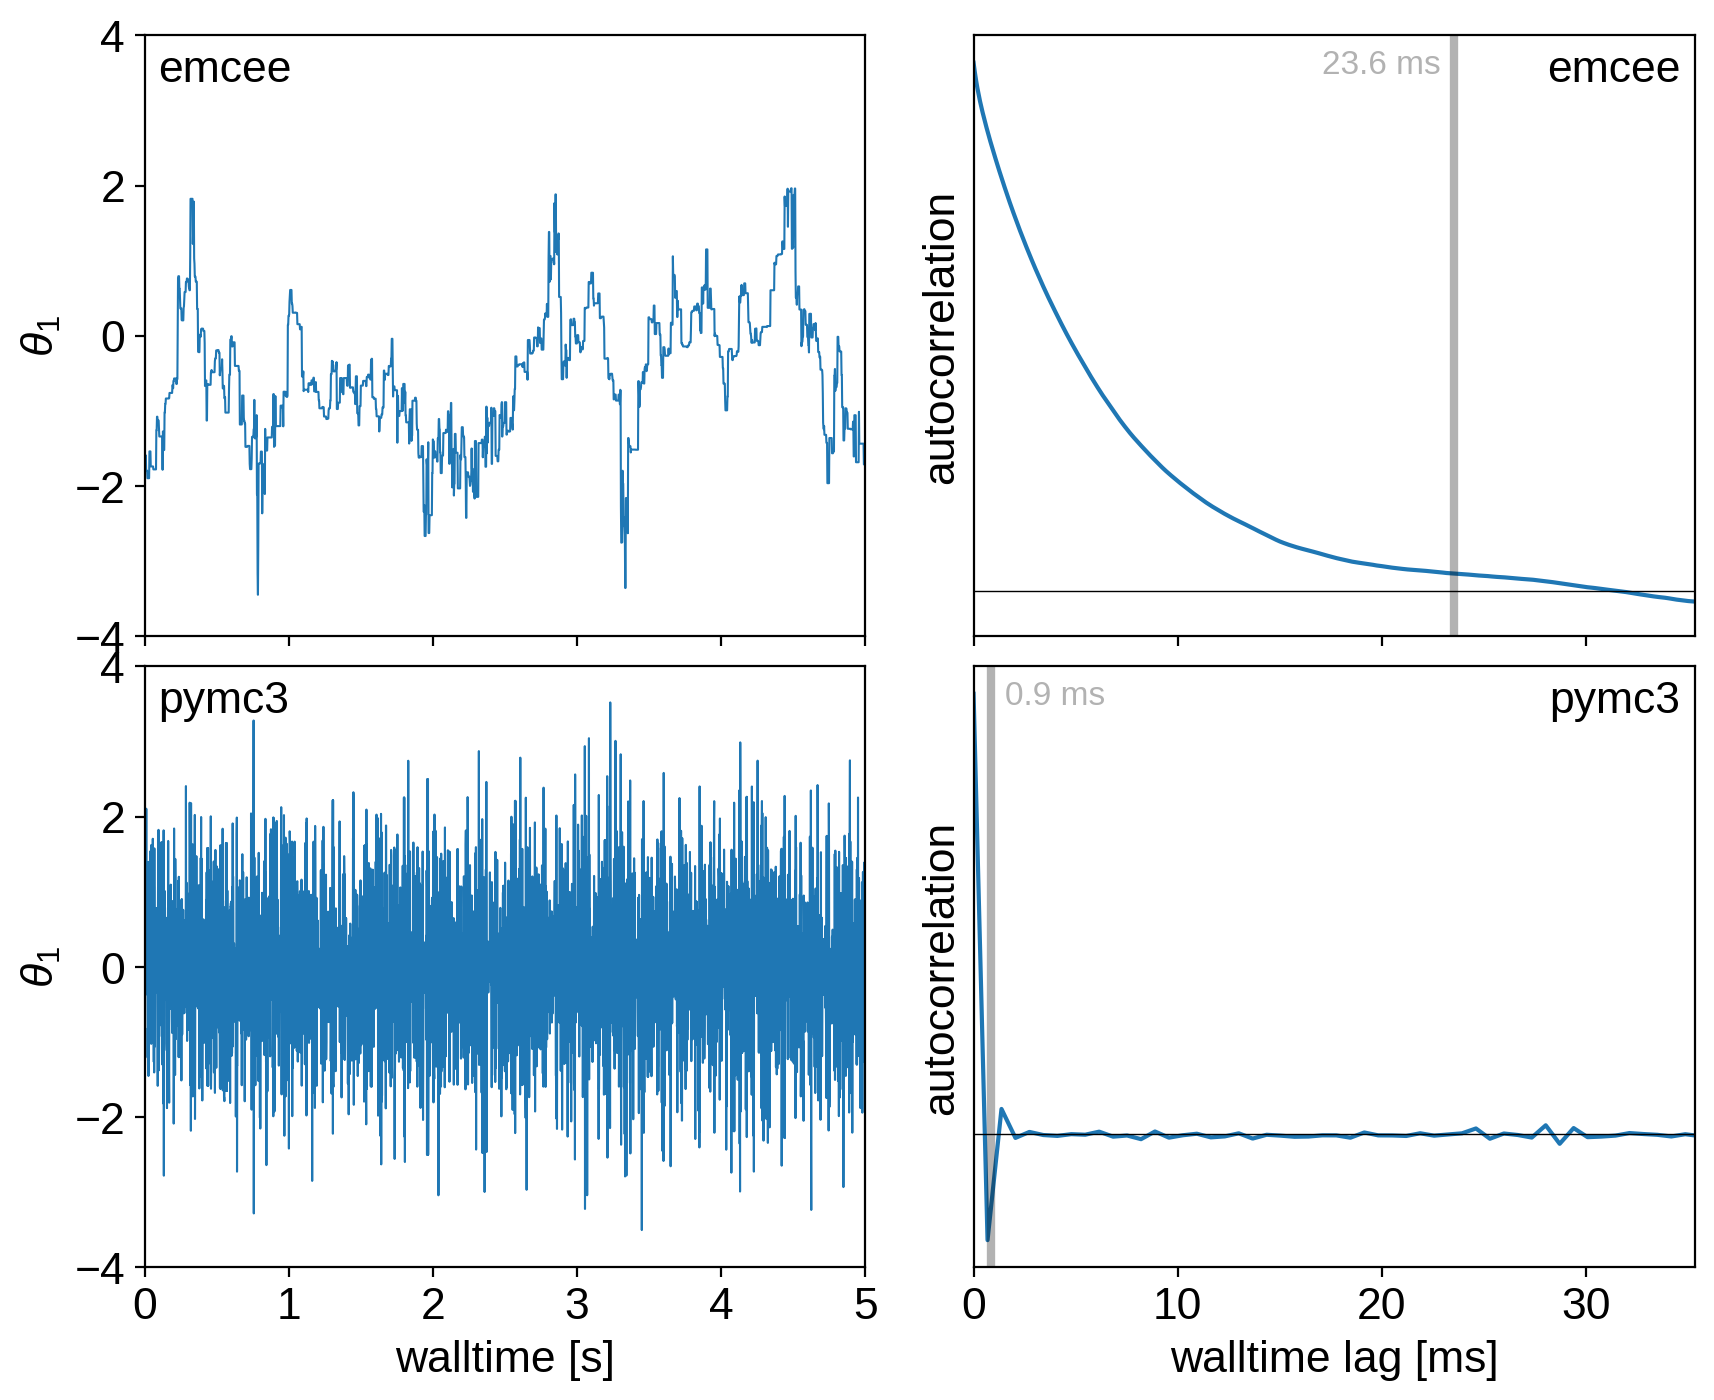

In [9]:
def get_function(x):
    n_t, n_w = x.shape
    f = np.zeros(n_t)
    for k in range(n_w):
        f += emcee.autocorr.function_1d(x[:, k])
    f /= n_w
    return f

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

ax = axes[0, 0]
t_emcee = np.linspace(0, time_emcee, samples_emcee.shape[0])
m = t_emcee < 5
ax.plot(t_emcee[m], samples_emcee[m, 5, 0], lw=0.75)
ax.annotate("emcee", xy=(0, 1), xycoords="axes fraction",
            ha="left", va="top", fontsize=16,
            xytext=(5, -5), textcoords="offset points")
ax.set_ylabel(r"$\theta_1$")
ax.set_xlim(0, 5)
ax.set_ylim(-4, 4)
ax.set_xticklabels([])

ax = axes[1, 0]
t_pymc3 = np.linspace(0, time_pymc3, samples_pymc3.shape[0])
m = t_pymc3 < 5
ax.plot(t_pymc3[m], samples_pymc3[m, 0, 0], lw=0.75)
ax.annotate("pymc3", xy=(0, 1), xycoords="axes fraction",
            ha="left", va="top", fontsize=16,
            xytext=(5, -5), textcoords="offset points")
ax.set_ylabel(r"$\theta_1$")
ax.set_xlabel("walltime [s]")
ax.set_xlim(0, 5)
ax.set_ylim(-4, 4)

ax = axes[0, 1]
f_emcee = get_function(samples_emcee[:, :, 0])
scale = 1e3*time_emcee / np.prod(samples_emcee.shape[:2])
ax.plot(scale * np.arange(len(f_emcee)), f_emcee)
ax.axhline(0, color="k", lw=0.5)
ax.annotate("emcee", xy=(1, 1), xycoords="axes fraction",
            ha="right", va="top", fontsize=16,
            xytext=(-5, -5), textcoords="offset points")
val = 2*scale*tau_emcee[0]
max_x = 1.5*val
ax.axvline(val, color="k", lw=3, alpha=0.3)
ax.annotate("{0:.1f} ms".format(val), xy=(val/max_x, 1), xycoords="axes fraction",
            ha="right", va="top", fontsize=12, alpha=0.3,
            xytext=(-5, -5), textcoords="offset points")
ax.set_xlim(0, max_x)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_ylabel("autocorrelation")

ax = axes[1, 1]
f_pymc3 = get_function(samples_pymc3[:, :, 0])
scale = 1e3*time_pymc3 / np.prod(samples_pymc3.shape[:2])
ax.plot(scale * np.arange(len(f_pymc3)), f_pymc3)
ax.axhline(0, color="k", lw=0.5)
ax.annotate("pymc3", xy=(1, 1), xycoords="axes fraction",
            ha="right", va="top", fontsize=16,
            xytext=(-5, -5), textcoords="offset points")
val = 2*scale*tau_pymc3[0]
ax.axvline(val, color="k", lw=3, alpha=0.3)
ax.annotate("{0:.1f} ms".format(val), xy=(val/max_x, 1), xycoords="axes fraction",
            ha="left", va="top", fontsize=12, alpha=0.3,
            xytext=(5, -5), textcoords="offset points")
ax.set_xlim(0, max_x)
ax.set_yticks([])
ax.set_xlabel("walltime lag [ms]")
ax.set_ylabel("autocorrelation")

fig.subplots_adjust(hspace=0.05, wspace=0.15)
fig.savefig("gaussians.pdf", bbox_inches="tight");